# Python/OpenCV/Webcam Test Notebook
This notebook is a quick test to make sure that a few things are working in your system.  This test that you can grab images from a camera (hopefully you're using a laptop with a built-in webcam or have an external USB webcam -- if you don't then please let me know ASAP).



In [6]:
# This allows you to display/plot images, etc. within the notebook document
# (pylab includes matplotlib)
%pylab inline

import cv2 # This imports the OpenCV library/modele
import numpy as np # This imports numpy for subsequent ease of use

import os.path
import urllib.request
import time

Populating the interactive namespace from numpy and matplotlib


<br>

### Load and Display an Image
***
So that we're all working with the same image, we'll download one off the web.

In [7]:
IMG_URL = 'https://www.intel.com/content/dam/develop/external/us/en/images/expanding-possibilities-computer-vision-with-ai-wallpaper-780924.jpg'
LOCAL_FILE = 'vision_image.png'
urllib.request.urlretrieve(IMG_URL, LOCAL_FILE)
if os.path.exists(LOCAL_FILE):
    print(f'Successfully downloaded file: {LOCAL_FILE}')

Successfully downloaded file: vision_image.png


<br>

Now we'll use OpenCV to read the image and matplotlib to display it...

Displaying Image...


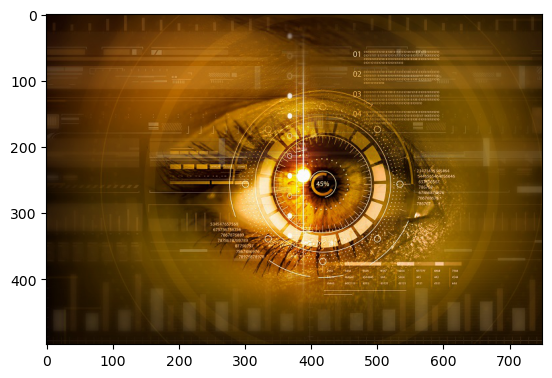

In [9]:
im = cv2.imread(LOCAL_FILE)
print('Displaying Image...')
imshow(im);

<br>

### Testing the Camera
***
Now we'll use the OpenCV library to grab a frame from our camera which we can then do various operations with.

In [11]:
# Create a Video Capture Device (device zero is the default which 
# would be the webcam if you're on a laptop)
cap = cv2.VideoCapture(0)

# Grab a few frames to make sure the exposure adjusts itself
for i in range (10):
    ret, frame = cap.read()
    time.sleep(0.1)

# Now grab the actual frame that we're going to use
ret, frame = cap.read()

if not frame == None:
    print('Successfully grabbed a frame from the camera!')
else:
    print('ERROR: cap.read() returned {}'.format(frame))

[ WARN:0@84.586] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_506zufg7xt/croots/recipe/opencv-suite_1664548331847/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<br>

Now we'll display the frame.

[[[11  3  0]
  [11  3  0]
  [11  3  0]
  ...
  [ 8  2  0]
  [ 7  1  0]
  [ 7  1  0]]

 [[11  3  0]
  [11  3  0]
  [11  3  0]
  ...
  [ 7  1  0]
  [ 7  1  0]
  [ 7  1  0]]

 [[10  2  0]
  [10  2  0]
  [11  3  0]
  ...
  [ 8  2  0]
  [ 7  1  0]
  [ 7  1  0]]

 ...

 [[10  5  1]
  [12  6  2]
  [12  6  2]
  ...
  [ 5  5  0]
  [ 4  3  0]
  [ 4  3  0]]

 [[10  5  1]
  [12  6  2]
  [12  6  2]
  ...
  [ 4  3  0]
  [ 3  2  0]
  [ 3  2  0]]

 [[ 9  3  0]
  [10  5  1]
  [10  5  1]
  ...
  [ 3  2  0]
  [ 3  2  0]
  [ 3  2  0]]]


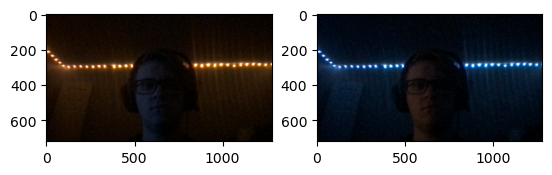

In [12]:
print(frame)
subplot(1,2,1)
imshow(frame)

subplot(1,2,2)
imshow(frame[:,:,::-1])

# release/free up the capture object, we're done with it
cap.release()

#### QUESTION -- What's the difference between the two images above???

<br>

### Test for SIFT
***
We'll use the image that we downloaded off the web and extract SIFT descriptors from it.

In [13]:
SIFT = cv2.xfeatures2d.SIFT_create()

f,d = SIFT.detectAndCompute(im,None)
if d.shape[1] == 128:
    print( f'Found {d.shape[0]} SIFT feature points!' )

[ WARN:0@124.832] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_506zufg7xt/croots/recipe/opencv-suite_1664548331847/work/opencv_contrib-4.6.0/modules/xfeatures2d/misc/python/shadow_sift.hpp (15) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


Found 1151 SIFT feature points!
